In [ ]:
# 1. I found my data on Friday June 13th
# 2. I started writing on Friday June 13th
# 3. I finished writing y code on the 16th of June
# 4. I think I ended up rewriting the entirety of my code about 2/3 times
# 5. I reviewed my presentation 4 times before submiting it


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load SIPRI Excel file
sipri = pd.ExcelFile("SIPRI-Milex-data-1948-2023.xlsx")
df_sipri = sipri.parse("Constant (2022) US$", skiprows=5)

# Rename first column for clarity
df_sipri.rename(columns={df_sipri.columns[0]: "Country"}, inplace=True)
df_sipri.columns = df_sipri.columns.astype(str)

# Keep 2018–2022 columns
military_recent_df = df_sipri[["Country", "2018", "2019", "2020", "2021", "2022"]].dropna(subset=["Country"])

# Preview
military_recent_df.head()


,Country,2018,2019,2020,2021,2022
1,Africa,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN
3,Algeria,9624.504002,10383.207823,10141.073361,9455.120355,9145.810174
4,Libya,...,...,...,...,...
5,Morocco,3731.482387,3809.704239,4883.245061,5026.030416,4995.028074


In [4]:
# Loading our military % of GDP data
gdp_pct_df = pd.read_excel("Military_API_MS.MIL.XPND.GD.ZS_DS2_en_excel_v2_761.xls", engine="xlrd", skiprows=3)

# Renaming these for consistency
gdp_pct_df.columns = gdp_pct_df.columns.astype(str)
gdp_pct_df.rename(columns={"Country Name": "Country"}, inplace=True)

# Filter top 10 countries
top10 = [
    "United States", "China", "Russian Federation", "India", "Saudi Arabia",
    "United Kingdom", "Ukraine", "Germany", "France", "Japan"
]

# Keep the 5 years we care about
gdp_pct_clean = gdp_pct_df[gdp_pct_df["Country"].isin(top10)][["Country", "2018", "2019", "2020", "2021", "2022"]]

# Previewing our code
gdp_pct_clean.head()



,Country,2018,2019,2020,2021,2022
40,China,1.673578,1.682911,1.756699,1.613074,1.595381
55,Germany,1.170549,1.262150,1.373586,1.326786,1.390055
77,France,1.843009,1.836461,2.002840,1.915361,1.938723
81,United Kingdom,1.939953,1.981327,2.156778,2.161572,2.227184
109,India,2.424285,2.548622,2.812528,2.471447,2.425227


In [5]:
# Fixing slight country name differences between the two files
rename_map = {
    "United States of America": "United States",
    "Russia": "Russian Federation"
}
military_recent_df["Country"] = military_recent_df["Country"].replace(rename_map)

# Merging the two datasets on Country name
merged_df = pd.merge(military_recent_df, gdp_pct_clean, on="Country", suffixes=("_spending", "_gdp_pct"))

# Preview the merged data changes we just made
merged_df.head()


,Country,2018_spending,2019_spending,2020_spending,2021_spending,2022_spending,2018_gdp_pct,2019_gdp_pct,2020_gdp_pct,2021_gdp_pct,2022_gdp_pct
0,United States,795416.282151,840614.812557,880185.235566,870751.188999,860692.2,3.323866,3.434568,3.696010,3.457977,3.454920
1,India,71568.220179,76620.727414,77085.469741,76596.864198,79976.789328,2.424285,2.548622,2.812528,2.471447,2.425227
2,China,248153.160601,260242.521275,272509.054677,279605.778186,291958.42846,1.673578,1.682911,1.756699,1.613074,1.595381
3,Japan,41899.828092,43091.611716,42722.206666,43660.12799,46880.194665,0.962497,0.992231,1.017830,1.018297,1.077734
4,Russian Federation,72514.626378,75764.914722,77544.910059,79081.150175,102366.63646,3.719822,3.860338,4.171479,3.720451,4.056316


In [6]:
# Calculate estimated GDP for each year using military spending and % of GDP
for year in ["2018", "2019", "2020", "2021", "2022"]:
    spend_col = f"{year}_spending"
    pct_col = f"{year}_gdp_pct"
    gdp_col = f"{year}_gdp_est"
    merged_df[gdp_col] = merged_df[spend_col] / (merged_df[pct_col] / 100)

# Round the GDP numbers to make them easier to read
for year in ["2018", "2019", "2020", "2021", "2022"]:
    merged_df[f"{year}_gdp_est"] = merged_df[f"{year}_gdp_est"].round(2)

# Check the results
merged_df[["Country", "2018_gdp_est", "2019_gdp_est", "2020_gdp_est", "2021_gdp_est", "2022_gdp_est"]]


,Country,2018_gdp_est,2019_gdp_est,2020_gdp_est,2021_gdp_est,2022_gdp_est
0,United States,23930452.83478,24475127.031775,23814472.26798,25180940.584431,24912074.675783
1,India,2952137.812631,3006358.816076,2740789.842818,3099272.438692,3297703.079783
2,China,14827700.265255,15463831.390661,15512559.727911,17333724.410823,18300235.205958
3,Japan,4353240.847195,4342899.132794,4197383.18675,4287561.668089,4349883.705569
4,Russian Federation,1949410.961304,1962650.017931,1858930.894682,2125579.463981,2523635.438398
5,Ukraine,181052.000237,190250.246716,194976.626253,213090.119665,122766.422294
6,France,2700695.013035,2755101.778444,2598990.084289,2767712.501882,2766704.537095
7,Germany,3961062.054492,4029696.39929,3945283.794501,4048569.745061,4039633.025474
8,United Kingdom,3023669.056219,3083511.224022,2877667.70154,2914924.505013,2877249.24796
9,Saudi Arabia,873453.3708,877966.9137,742848.774597,854163.651095,955443.294726


In [7]:
# Load the population file and skip the extra header rows
pop_df = pd.read_excel("C:/Users/heart/Downloads/population chart.xlsx", skiprows=4)

# Rename the country column and make sure all column names are strings
pop_df.rename(columns={"Country Name": "Country"}, inplace=True)
pop_df.columns = pop_df.columns.astype(str)

# Grab just the 10 countries we’re working with
filtered_pop = pop_df[pop_df["Country"].isin(top10)]

# Keep the years we care about
pop_clean = filtered_pop[["Country", "2018", "2019", "2020", "2021", "2022"]].copy()

# Take a look at what we just did
pop_clean.head()


,Country,2018,2019,2020,2021,2022
40,China,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09
55,Germany,8.290578e+07,8.309296e+07,8.316087e+07,8.319608e+07,8.379798e+07
77,France,6.715835e+07,6.738206e+07,6.760111e+07,6.784281e+07,6.806502e+07
81,United Kingdom,6.646034e+07,6.683633e+07,6.708123e+07,6.702629e+07,6.779100e+07
109,India,1.374659e+09,1.389030e+09,1.402618e+09,1.414204e+09,1.425423e+09


In [8]:
# Bring population into the main dataset
merged_full = pd.merge(merged_df, pop_clean, on="Country")

# Calculate per-person spending and per-person GDP for each year
for year in ["2018", "2019", "2020", "2021", "2022"]:
    merged_full[f"{year}_per_capita_spending"] = (merged_full[f"{year}_spending"] * 1_000_000) / merged_full[year]
    merged_full[f"{year}_per_capita_gdp"] = (merged_full[f"{year}_gdp_est"] * 1_000_000) / merged_full[year]

# Round to make everything easier to read
for year in ["2018", "2019", "2020", "2021", "2022"]:
    merged_full[f"{year}_per_capita_spending"] = merged_full[f"{year}_per_capita_spending"].round(2)
    merged_full[f"{year}_per_capita_gdp"] = merged_full[f"{year}_per_capita_gdp"].round(2)

# Quick check
merged_full[[f"{year}_per_capita_spending" for year in ["2018", "2019", "2020", "2021", "2022"]] + 
            [f"{year}_per_capita_gdp" for year in ["2018", "2019", "2020", "2021", "2022"]]].head()


,2018_per_capita_spending,2019_per_capita_spending,2020_per_capita_spending,2021_per_capita_spending,2022_per_capita_spending,2018_per_capita_gdp,2019_per_capita_gdp,2020_per_capita_gdp,2021_per_capita_gdp,2022_per_capita_gdp
0,2433.669885,2560.274519,2654.943379,2622.357692,2582.556354,73218.041551,74544.301573,71832.692604,75835.019315,74750.110131
1,52.062524,55.161307,54.95829,54.162532,56.107399,2147.541809,2164.357963,1954.053376,2191.531538,2313.490514
2,176.903505,184.864817,193.118174,197.970615,206.743802,10570.375734,10984.824234,10993.239124,12272.879727,12958.900424
3,330.411621,340.287379,338.364235,347.386813,374.666923,34328.574392,34295.161078,33243.703018,34114.475841,34764.308395
4,498.731575,520.888281,533.889848,546.341411,709.711683,13407.402716,13493.335245,12798.574825,14684.815291,17496.457987


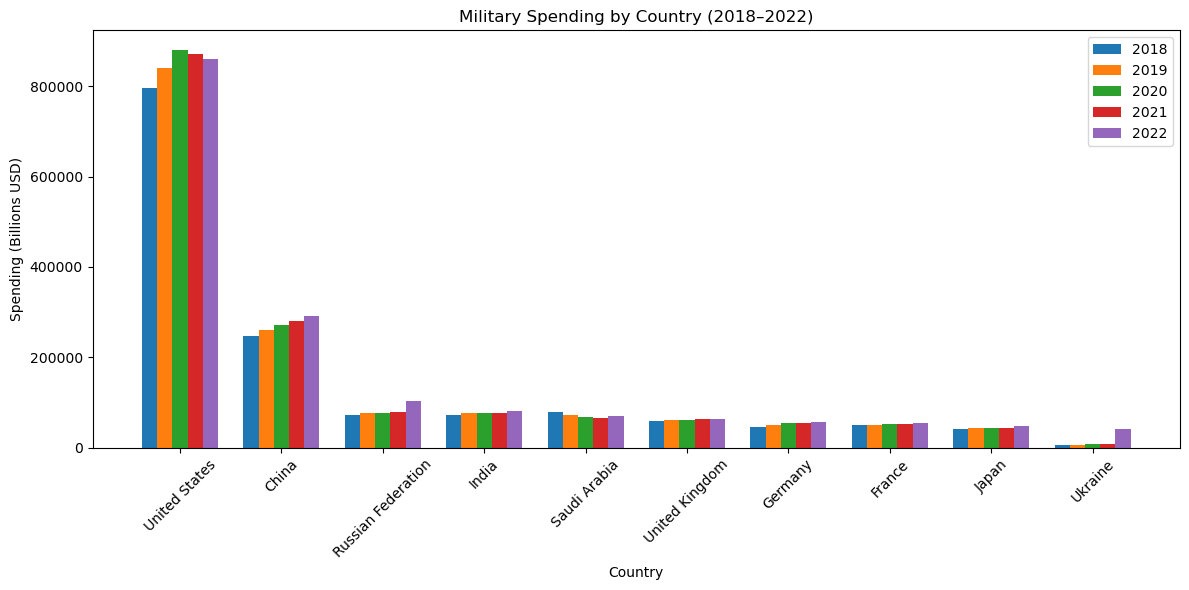

In [9]:
# Showing how each country's spending changed over 5 years
years = ["2018", "2019", "2020", "2021", "2022"]
spending_cols = [f"{year}_spending" for year in years]

# Sort countries by most recent year to make the chart more readable
merged_full_sorted = merged_full.sort_values(by="2022_spending", ascending=False)

plt.figure(figsize=(12, 6))

# Create a group of bars for each year
for i, year in enumerate(years):
    plt.bar(
        [x + i*0.15 for x in range(len(merged_full_sorted))],
        merged_full_sorted[f"{year}_spending"],
        width=0.15,
        label=year
    )

# Here we'll Set up the x-axis with country names
plt.xticks([x + 0.3 for x in range(len(merged_full_sorted))], merged_full_sorted["Country"], rotation=45)
plt.xlabel("Country")
plt.ylabel("Spending (Billions USD)")
plt.title("Military Spending by Country (2018–2022)")
plt.legend()
plt.tight_layout()
plt.savefig("yearly_military_spending_by_country.png")
plt.show()


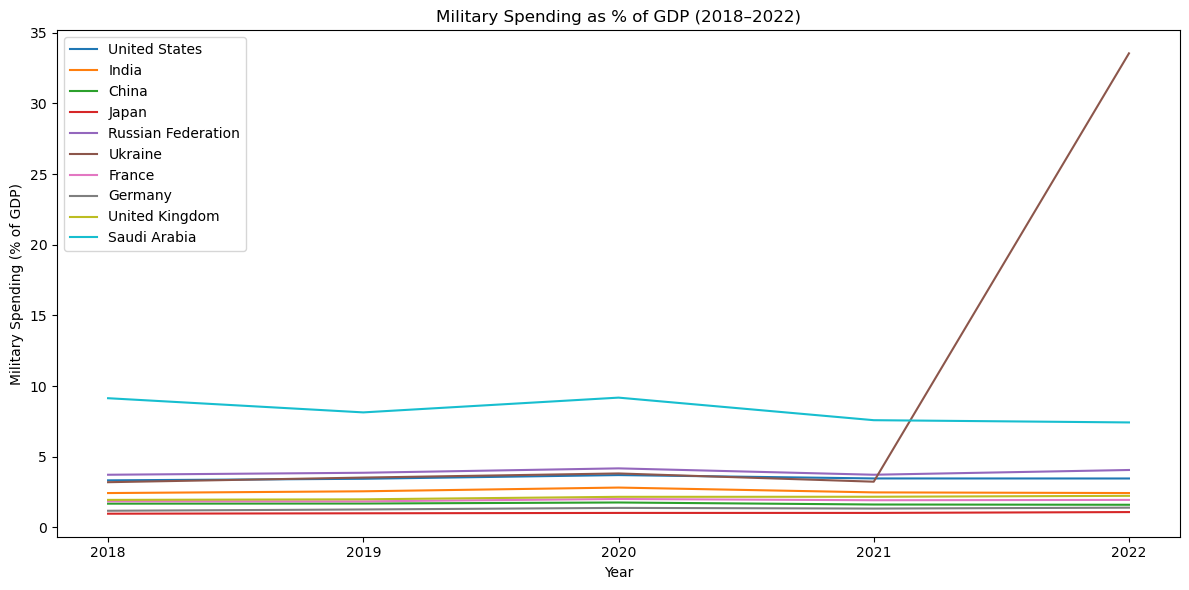

In [10]:
# Now we'll see how each country’s spending as a % of GDP changed over time
gdp_pct_cols = [f"{year}_gdp_pct" for year in years]

plt.figure(figsize=(12, 6))

# Loop through each country and plot their trend
for index, row in merged_full.iterrows():
    plt.plot(years, [row[f"{year}_gdp_pct"] for year in years], label=row["Country"])

plt.xlabel("Year")
plt.ylabel("Military Spending (% of GDP)")
plt.title("Military Spending as % of GDP (2018–2022)")
plt.legend()
plt.tight_layout()
plt.savefig("military_spending_percent_of_gdp.png")
plt.show()


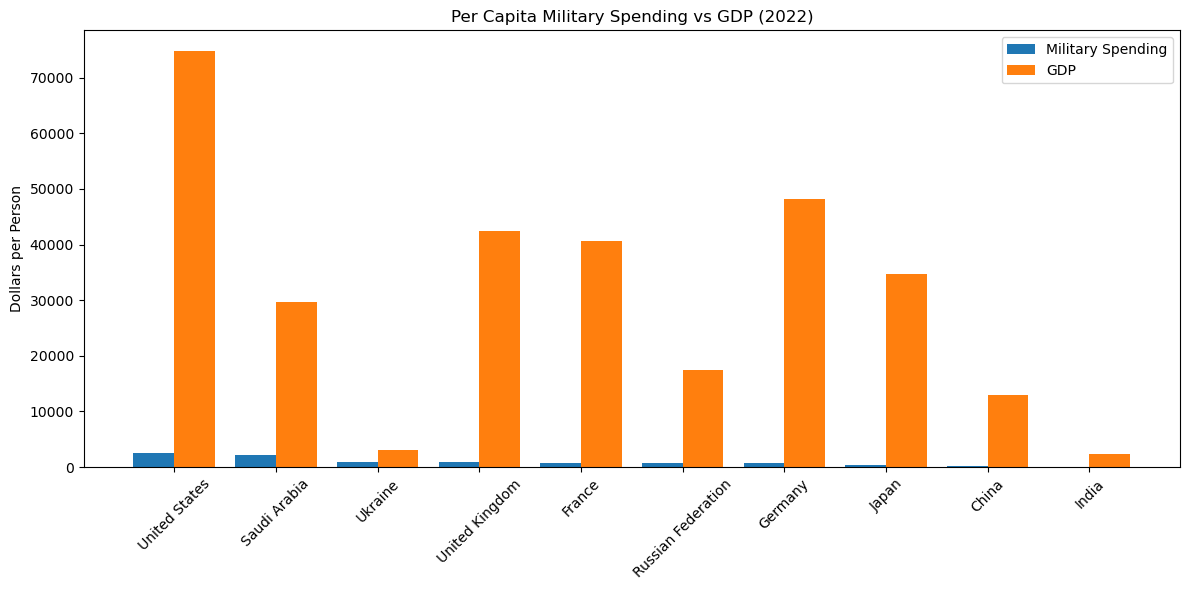

In [11]:
# This compares how much money is spent per person on military vs total GDP per person
merged_full_sorted = merged_full.sort_values(by="2022_per_capita_spending", ascending=False)

x = range(len(merged_full_sorted))

plt.figure(figsize=(12, 6))

# Plot per capita military spending
plt.bar(x, merged_full_sorted["2022_per_capita_spending"], width=0.4, label="Military Spending", align='center')

# Plot per capita GDP next to it
plt.bar([i + 0.4 for i in x], merged_full_sorted["2022_per_capita_gdp"], width=0.4, label="GDP", align='center')

plt.xticks([i + 0.2 for i in x], merged_full_sorted["Country"], rotation=45)
plt.ylabel("Dollars per Person")
plt.title("Per Capita Military Spending vs GDP (2022)")
plt.legend()
plt.tight_layout()
plt.savefig("2022_per_capita_spending_vs_gdp.png")
plt.show()
